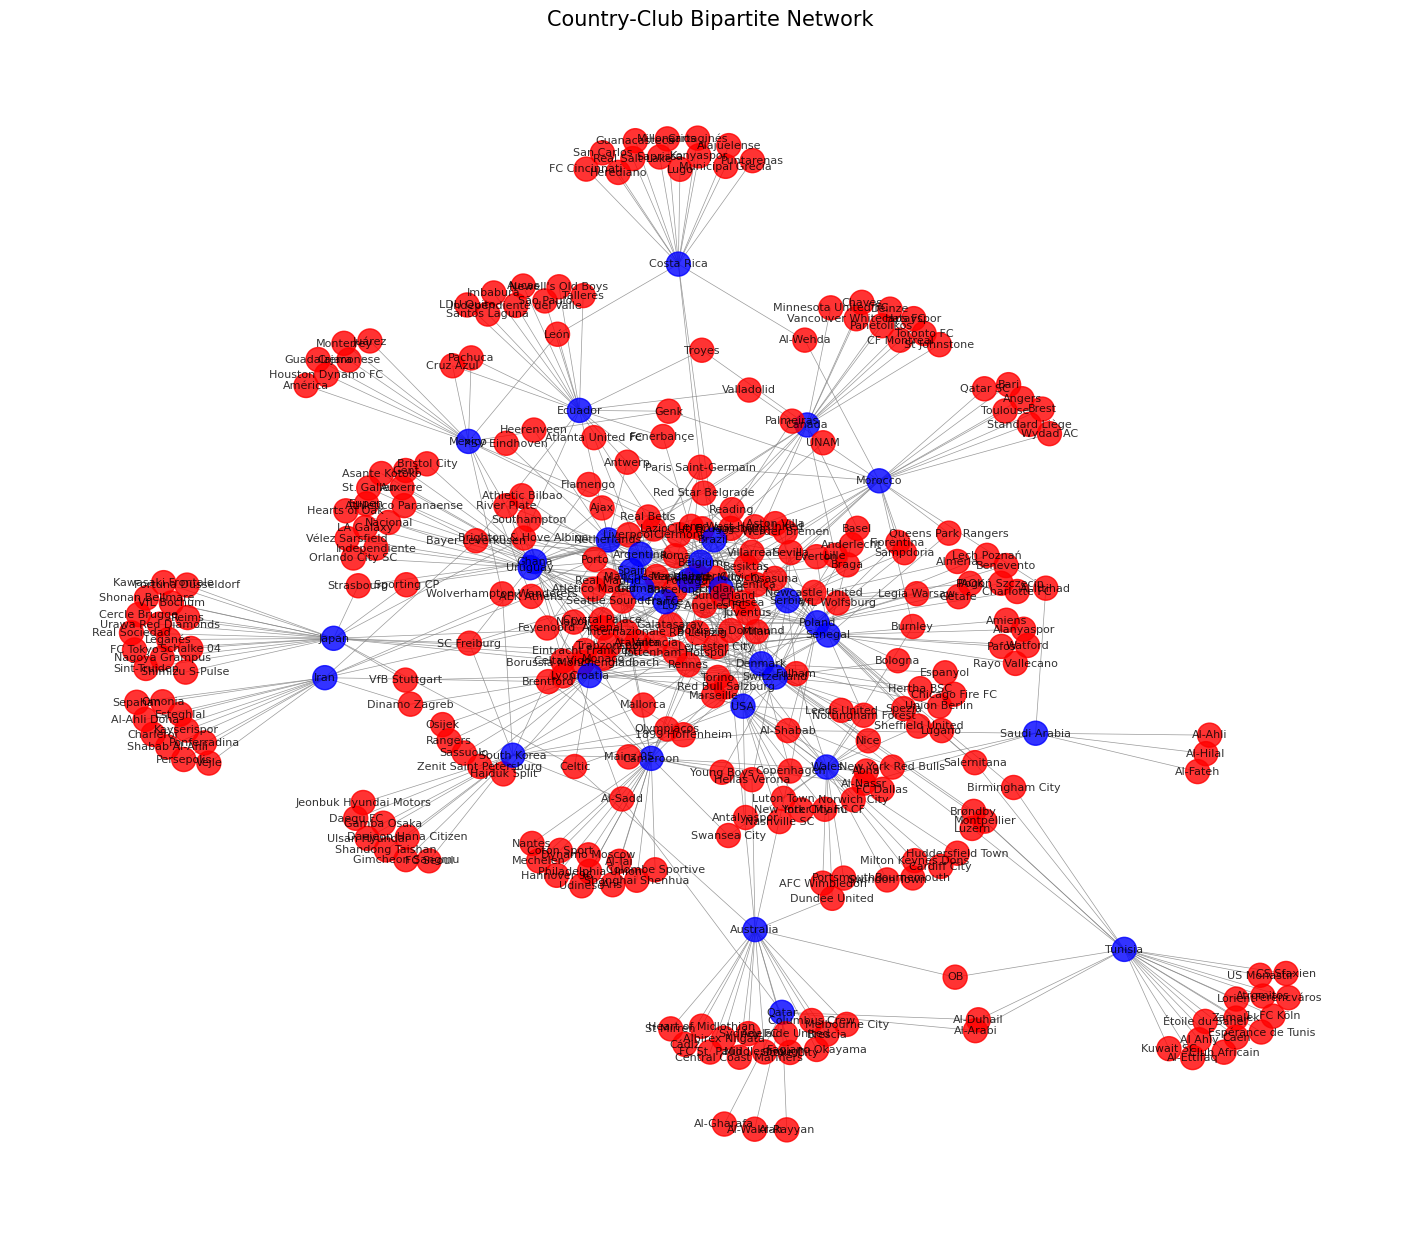

Country-Club projection saved as GraphML files.


In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load FIFA 2022 data
fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa_df = pd.read_excel(fifaLink, sheet_name='fifa2022')

# Create a bipartite graph (Countries-Clubs)
G_country_clubs = nx.Graph()
edges = [(row['nationality'], row['club']) for _, row in fifa_df.iterrows()]
G_country_clubs.add_edges_from(edges)

# Extract bipartite node sets
country_nodes = {n for n in fifa_df['nationality'].unique()}
club_nodes = set(fifa_df['club'].unique())

# Graph
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G_country_clubs, seed=42)
node_colors = ["blue" if node in country_nodes else "red" for node in G_country_clubs.nodes()]

nx.draw(
    G_country_clubs, pos, with_labels=True, node_color=node_colors, edge_color="gray",
    node_size=300, font_size=8, width=0.5, alpha=0.8
)
plt.title("Country-Club Bipartite Network", fontsize=15)
plt.show()

# Projection
G_club_projected = nx.bipartite.weighted_projected_graph(G_country_clubs, club_nodes)
G_country_projected = nx.bipartite.weighted_projected_graph(G_country_clubs, country_nodes)

# Save projection as GraphML files
nx.write_graphml(G_club_projected, "fifa_club_projected.graphml")
nx.write_graphml(G_country_projected, "fifa_country_projected.graphml")

print("Projections saved as GraphML files.")
